# Linear Regression

Linear regression is one of the simplest models there is. It assumes that there is a linear relation between the attributes to the target variable. It is very simple but it also works very good. 

"All models are wrong, but some are useful".  
-- <cite> George Box.
    
What it is trying to find is the relationship:
$$Y = \beta_{0} + \beta_{1}X$$
Which is basically the line equation. We want to find those coefficients, beta 0 and beta 1. It can be extended to n attributes and n + 1 unknown coefficients.

Here we are dealing with estimates, not the true value, so we can use the following formula:
    
$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}*x_{i}$$

Which is the prediction of our regression. Then, we need the residual, which is:
$$e_{i} = y_{i} - \hat{y}_{i}$$
    
The true value minus the predicted value for the i point. The sum of all the squared errors is the function that the regression must minimize.
    $$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$$
But we can expand that expression into:
$$RSS = (y_{1} - \hat{y}_{1})^{2} + (y_{2} - \hat{y}_{2})^{2} + ... + (y_{n} - \hat{y}_{n})^{2}$$

Even more:
$$RSS = (y_{1} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{1})^{2} + (y_{2} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{2})^{2} + ... + (y_{n} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{3})^{2}$$
    
They way of minimizing the RSS, the algorithm will find the $\beta_{0}$ and $\beta_{1}$ that optimize the function.
    
$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} * \bar{x}$$

Now, implement a linear regression without sklearn. In other words, find both coefficients and the Residual Sum of Squares (RSS). We are using a dataset about Teen Birth Rate. We want to predict the teen birth rate depending on the poverty of the state. The dataset is from the United States.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('OLSDataset.txt',sep='\s+')

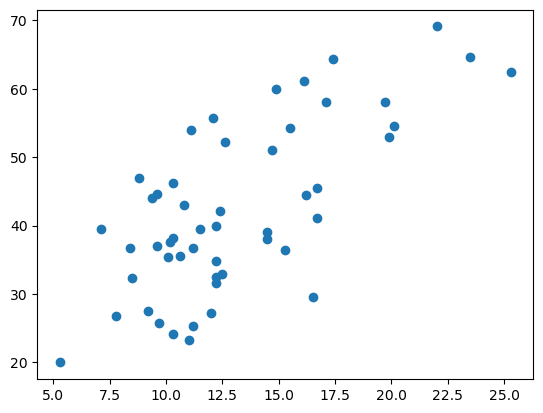

In [7]:
plt.scatter(data['PovPct'], data['TeenBrth']) 

In [27]:
# extract the independent and dependent variables
X = data['PovPct']
y = data['TeenBrth']

# calculate the slope and intercept of the regression line
def calcuate_y_hat(X,y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    slope = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
    intercept = y_mean - slope * x_mean
    # calculate y_hat (the predicted values of y)
    y_hat = intercept + slope * X
    return y_hat

# print the first 5 predicted values
y_hat=calcuate_y_hat(X,y)

In [28]:
def plot_graph(X,y,y_hat,X_name,y_name):
    plt.scatter(X, y) 
    plt.plot(X,y_hat,color='r')
    plt.xlabel(X_name)
    plt.ylabel(y_name)
    plt.show()

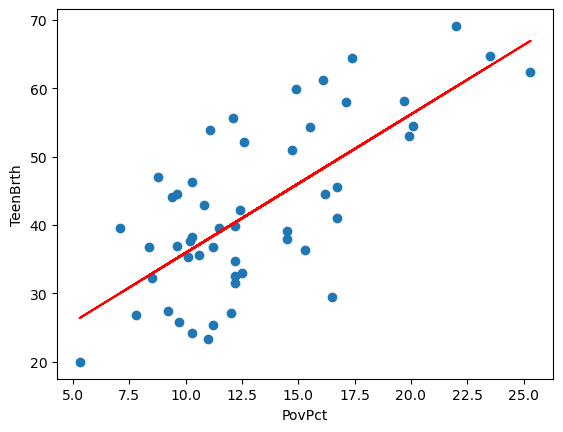

In [29]:
plot_graph(X,y,y_hat,'PovPct','TeenBrth')

## Exercise

This time, do it the right way. Do a regression for three different train and test divisions, and then calculate the MSE for each one. Plot the three regressions.

In [15]:
data

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1
5,Colorado,8.8,26.2,79.1,5.8,47.0
6,Connecticut,9.7,14.1,45.1,4.6,25.8
7,Delaware,10.3,24.7,77.8,3.5,46.3
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1
9,Florida,16.2,23.2,78.4,7.3,44.5


40
40
69.1 60.69633202677953
32.3 32.7274598431646
25.8 35.21358181504148
33.0 41.01453308275421
41.1 49.71595998432329
58.0 50.54466730828226
52.2 41.22170991374395
25.4 38.32123427988759
45.5 49.71595998432329
32.5 40.393002589784984
44.5 48.68007582937459
43.0 37.492526955928625
36.4 46.81548435046693
36.8 32.520283012174865
44.1 34.592051322072265
38.2 36.45664280097993
54.5 56.759972237974466
24.2 36.45664280097993
37.0 35.00640498405174
27.2 39.97864892780551
47.0 33.348990336133824
20.0 26.097801251492918
36.8 38.32123427988759
39.5 29.82698420930824
23.3 37.90688061790811
61.2 48.47289899838486
35.6 37.07817329394915
39.5 38.942764772856805
27.5 34.17769766009278
38.0 45.158069702549014
55.7 40.18582575879525
34.8 40.393002589784984
58.1 55.9312649140155
39.9 40.393002589784984
35.4 36.042289139000445
46.3 36.45664280097993
54.3 47.22983801244641
44.6 35.00640498405174
53.9 38.114057448897846
31.6 40.393002589784984
8     69.1
49    32.3
6     25.8
47    33.0
4     41.1
36    5

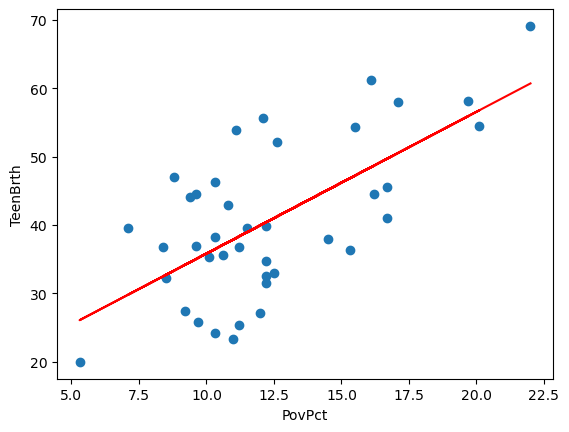

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
# extract the independent and dependent variables
X = data_train['PovPct']
y = data_train['TeenBrth']
print(len(X))
print(len(y))
y_hat_PovPct=calcuate_y_hat(X,y)
MSE=np.sum((y-y_hat_PovPct)**2)/len(y)
for i in y.index.tolist():
    print(y[i],y_hat_PovPct[i])
print(y)
print(y_hat_PovPct)
print(MSE)
plot_graph(X,y,y_hat_PovPct,"PovPct",'TeenBrth')


# Multiple Linear Regression

The same can be done but with multiple attributes. In this case, there will be one coefficient for each attribute:  

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon$$  


Use the following dataset, to predict the G3 column. It is the grade of the year for the students. Multiple variables are categorical, remember to convert them to numerical. Other columns might not add value to the prediction, so you can also do some feature engineering. 

Usually while computing regression, we need to add a new column for the intercept term, in the data. That way we can do:
$$f(x') = \beta^{'T}x'$$
Because $\beta'$ will contain the intercept term, $\beta' = (\beta_{0},\beta_{1},...,\beta_{n})$

That gives us the following equation:

$$y = X*\beta+\epsilon$$

The optimization problem is to find the $\hat\beta$ that minimize the loss $L(\hat{\beta}) = \hat{\epsilon}^{T}\hat{\epsilon}$
The solution is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Inverting takes $O(n^{3})$ so it is unfeasible for datasets with many dimensions.

In [ ]:
X = data[['PovPct','ViolCrime']]
y = data['TeenBrth']

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
import statsmodels.api as sm

C:\Users\srodriguezb\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\srodriguezb\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Polynomial Regression

What if the data is not linear? In that case, a linear regression wouldn't work because it does not capture how the data is. Then, we can try to fit a regression but in a with a higher polynomial. This can be done by transforming the data in the following way:


$$X = \begin{pmatrix}
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{3} & x_{3}^{2} & x_{3}^{3}\\
\end{pmatrix}$$

We take each input and take it into a higher polynomial. Also, include the intercept term. We can do it again by hand, but in this case, we are going to use our friend Sklearn.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
def functionf(x):
    arr = []
    for i in x:
        arr.append(2-i+(i**2))
    return np.array(arr)

In [ ]:
def sample_ds(n):
    x = np.random.uniform(-3,3,n)
    e = np.random.normal(0,0.4,n)
    y = np.add(functionf(x),e)
    return x,y

## Exercise

Train a linear regression for polynomials between 1 and 8, calculate the MSE for training set, validation set and test set. Generate a train set of 10 points, then a validation set of 10 points and then a test set of 1000 points. Fit a linear regression with polynomial features.

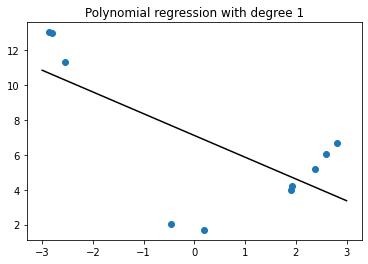